<h1>Capstone Project - The Battle of the Neighborhoods (Week 2)</h1>

<h2>Applied Data Science Capstone by IBM/Coursera</h2>

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data&&Methodology](#methodology)
* [Exploring and modeling](#results)
* [Data&&Methodology-2](#methodology-2)
* [Exploring and modeling-2](#results-2)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

There are many investors which investigates in restaurants but there investment do not success, that is not by chance, because off the place chosen, the behaviors of people in this place, the type of product that the buy do not   pay attention of client.
Now, I have an investor who want to open a restaurant in Canada, Toronto, his fist problem that he don’t know a better place, and he looking for a safety place, and his second problem is which type of dishs that the can make to pay attention of all categories of people
To solve this problems, as data scientist my objective is to locate safety place in Toronto, and   search in this place for what are the   preferable dish for people in this place, by looking as the restaurants in this place what type of dish buy.
Please note that we gonna take into consideration population.


## Data&&Methodology <a name="methodology"></a>

as we know we have tow problem the second oune depend on result of resolution of the first problem .
our first data is data of crime in TORONTO , just visit this site and will found a button 'Download' a click on it .
http://data.torontopolice.on.ca/datasets/neighbourhood-crime-rates-boundary-file-/data.



Now ,we need to load our csv .we gonna import  module that we need

In [2]:
import pandas as pd

In [4]:
crime=pd.read_csv('Neighbourhood_Crime_Rates_Boundary_File_.csv')

In [5]:
crime.head(3)

,OBJECTID,Neighbourhood,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,...,TheftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length
0,1,Yonge-St.Clair,97,12528,20,29,39,27,34,37,...,5,8,0,3,6,4.3,1.00,47.9,1.161315e+06,5873.270582
1,2,York University Heights,27,27593,271,296,361,344,357,370,...,46,37,39,38,28,36.3,-0.26,101.5,1.324666e+07,18504.777326
2,3,Lansing-Westgate,38,16164,44,80,68,85,75,72,...,5,5,11,6,11,7.0,0.83,68.1,5.346186e+06,11112.109625


let's see the columns of the table

In [6]:
crime.columns

Index(['OBJECTID', 'Neighbourhood', 'Hood_ID', 'Population', 'Assault_2014',
       'Assault_2015', 'Assault_2016', 'Assault_2017', 'Assault_2018',
       'Assault_2019', 'Assault_AVG', 'Assault_CHG', 'Assault_Rate_2019',
       'AutoTheft_2014', 'AutoTheft_2015', 'AutoTheft_2016', 'AutoTheft_2017',
       'AutoTheft_2018', 'AutoTheft_2019', 'AutoTheft_AVG', 'AutoTheft_CHG',
       'AutoTheft_Rate_2019', 'BreakandEnter_2014', 'BreakandEnter_2015',
       'BreakandEnter_2016', 'BreakandEnter_2017', 'BreakandEnter_2018',
       'BreakandEnter_2019', 'BreakandEnter_AVG', 'BreakandEnter_CHG',
       'BreakandEnter_Rate_2019', 'Homicide_2014', 'Homicide_2015',
       'Homicide_2016', 'Homicide_2017', 'Homicide_2018', 'Homicide_2019',
       'Homicide_AVG', 'Homicide_CHG', 'Homicide_Rate_2019', 'Robbery_2014',
       'Robbery_2015', 'Robbery_2016', 'Robbery_2017', 'Robbery_2018',
       'Robbery_2019', 'Robbery_AVG', 'Robbery_CHG', 'Robbery_Rate_2019',
       'TheftOver_2014', 'TheftOver_201

as we see there are many colimns represent  nombre of crime for every type  in each neighbor in Toronto since 2014 to 2019 and the avg for each crime between 2014 and 2019 , and population for every neighbors 
.

we gonna summerize all this columns by calculationg the avg betwen 2014 and 2019 for all neighbors

In [10]:
crime=crime[['Neighbourhood', 'Population',
        'Assault_AVG',   'AutoTheft_AVG',  'BreakandEnter_AVG',
       'Homicide_AVG', 'Homicide_CHG', 'Robbery_AVG', 
        'TheftOver_AVG']]

In [11]:
crime.head()

,Neighbourhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Homicide_CHG,Robbery_AVG,TheftOver_AVG
0,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,0.0,5.7,4.3
1,York University Heights,27593,333.2,106.3,113.2,0.8,-1.0,75.8,36.3
2,Lansing-Westgate,16164,70.7,23.7,38.8,1.7,-1.0,14.7,7.0
3,Yorkdale-Glen Park,14804,160.2,55.5,63.3,1.2,-0.5,31.5,22.5
4,Stonegate-Queensway,25051,83.2,28.7,52.8,0.0,0.0,20.7,6.0


our data look good know .
let 's  calculate the total average for every neighbor.

In [14]:
crime_only=crime[['Assault_AVG',   'AutoTheft_AVG',  'BreakandEnter_AVG',
       'Homicide_AVG', 'Homicide_CHG', 'Robbery_AVG', 
        'TheftOver_AVG']] ## we dont need for calculyio of avg neighbors colum and the column of population
x=0
total=[]                                                
for i in range(140):
    for j in range(7):
        x=crime_only.iloc[i,j]+x
    total.append(x/7)
    x=0

add the column of Total_avg this column contain the avg between 2014 and 2019 of crimes in each neighbors in Toronto  

In [17]:
crime['Total_avg']=total
crime

,Neighbourhood,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Homicide_CHG,Robbery_AVG,TheftOver_AVG,Total_avg
0,Yonge-St.Clair,12528,31.0,4.3,23.3,0.0,0.0,5.7,4.3,9.800000
1,York University Heights,27593,333.2,106.3,113.2,0.8,-1.0,75.8,36.3,94.942857
2,Lansing-Westgate,16164,70.7,23.7,38.8,1.7,-1.0,14.7,7.0,22.228571
3,Yorkdale-Glen Park,14804,160.2,55.5,63.3,1.2,-0.5,31.5,22.5,47.671429
4,Stonegate-Queensway,25051,83.2,28.7,52.8,0.0,0.0,20.7,6.0,27.342857
...,...,...,...,...,...,...,...,...,...,...
135,Milliken,26572,83.8,58.5,108.3,0.2,1.0,32.7,16.5,43.000000
136,Pleasant View,15818,46.0,13.5,19.8,0.2,0.0,11.8,3.8,13.585714
137,Wychwood,14349,70.2,13.2,34.0,0.3,0.0,13.8,2.3,19.114286
138,Leaside-Bennington,16828,32.8,18.2,33.3,0.2,0.0,7.5,5.2,13.885714


our data know , we don't need  columns of avg for everu crime.
our final data look know 

In [18]:
crime=crime[['Neighbourhood','Population','Total_avg']]
crime.head()


,Neighbourhood,Population,Total_avg
0,Yonge-St.Clair,12528,9.800000
1,York University Heights,27593,94.942857
2,Lansing-Westgate,16164,22.228571
3,Yorkdale-Glen Park,14804,47.671429
4,Stonegate-Queensway,25051,27.342857


In [19]:
crime.shape

(140, 3)

our data contain 140 column 

## Exploring and modeling <a name="results"></a>

Now we have the data that contain population and the avg o crime between 2014 and 2019 

let see the destribution of our data

In [21]:
import seaborn as sns ## for plotting our data

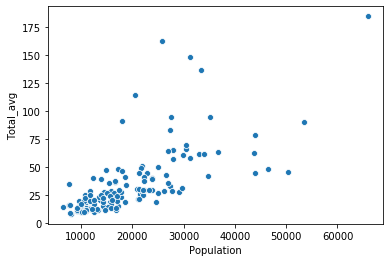

In [24]:
sns.scatterplot(x=crime['Population'],y=crime['Total_avg'],data=crime)

when we see this plot we found that thre are a part of neighbors  had a good population and total avg of crime under 50  and under 25 crime in 5 years .and that what we looking for  

then we need to cluster this data to take only safe places with  great numbre population and small  avg of crime in the last 5 years (betwenn 2014 and 2019)

to do that things we gonna use DBSCAN , because he is the one how ganna found the numbrer of cluster  .

fist we gonna noormalize our data


In [26]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(crime.iloc[:,1:3])
X_scaled

array([[-0.69848344, -0.86426522],
       [ 0.80836453,  2.03358317],
       [-0.33479946, -0.44125715],
       [-0.47083087,  0.42469385],
       [ 0.55410581, -0.26719176],
       [ 0.79366113, -0.07805367],
       [ 0.20562534, -0.29393365],
       [-0.91533352, -0.64060578],
       [ 0.15971474, -0.45876094],
       [-0.23317599, -0.65859578],
       [-0.51474101, -0.67366848],
       [ 2.44594269,  1.46714133],
       [-0.98474955, -0.51710688],
       [-0.95724319, -0.69943794],
       [-0.27878652,  0.04690389],
       [ 0.23383185,  0.52728547],
       [ 0.83667106,  1.01447407],
       [-0.16996139, -0.39506662],
       [-0.38291057, -0.26038474],
       [-0.70968603,  0.17088901],
       [-0.39671375,  0.03620713],
       [-0.61506418, -0.78938793],
       [ 1.18315108,  3.85932491],
       [ 0.74745046,  1.00197832],
       [-0.35770475, -0.21468042],
       [ 0.24223379, -0.25455014],
       [-0.53794637, -0.45292634],
       [-0.58715773, -0.50203418],
       [-0.51464099,

our data look similaire
let's cluster our data

In [30]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples = 2)
c = dbscan.fit_predict(X_scaled)

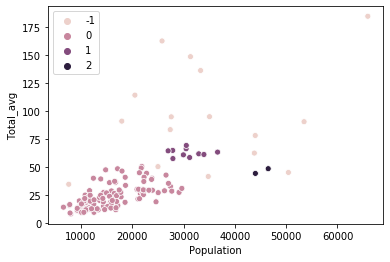

In [32]:
sns.scatterplot(x=crime['Population'],y=crime['Total_avg'],data=crime,hue=c)

as we say later , the population between 3000 and 0 and with avg under 50 with we gonna take it , with rhe numbre of  cluster is  0 
let add labes to our data.and take only places with  cluster 0.


In [33]:
crime['labels']=c
crime=crime[crime['labels']==0]

C:\Users\wahbi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
crime.head()

,Neighbourhood,Population,Total_avg,labels
0,Yonge-St.Clair,12528,9.800000,0
2,Lansing-Westgate,16164,22.228571,0
3,Yorkdale-Glen Park,14804,47.671429,0
4,Stonegate-Queensway,25051,27.342857,0
5,Tam O'Shanter-Sullivan,27446,32.900000,0


In [35]:
crime.shape

(112, 4)

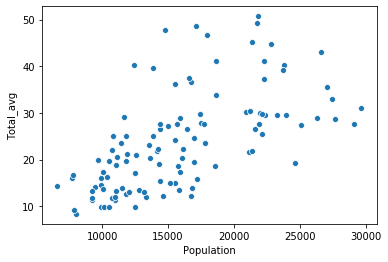

In [37]:
sns.scatterplot(x=crime['Population'],y=crime['Total_avg'],data=crime)

when we see this plot we found that in this cluster the some point with look like noise , to remove it we gonna cluster it again with DBSCAN

In [38]:
crime.drop(['labels'],axis=1,inplace=True)
X_scaled = scaler.fit_transform(crime.iloc[:,1:3])
dbscan1 = DBSCAN(eps=0.3, min_samples = 2)
c1 = dbscan.fit_predict(X_scaled)

C:\Users\wahbi\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array([ 0,  0, -1,  1,  2,  1,  0,  3,  0,  0,  0,  0,  4,  5,  0,  0,  6,
        4,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  1,
        7,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  8,  9,  1,  1,  0, -1,  6,  1,  1, 10,  0,  1,  8,  1, -1,  1,
        0,  0,  0,  8,  0, 11,  5,  0, -1,  0, -1,  9,  0, 10,  0,  0,  0,
        9,  1, 11,  3,  1, -1,  0,  2,  7,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0], dtype=int64)

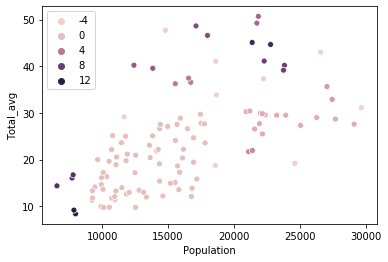

In [40]:
sns.scatterplot(x=crime['Population'],y=crime['Total_avg'],data=crime,hue=c1)

we gonna take point or place with cluster 0 ,it the best for us 

In [41]:
crime['labels']=c1

C:\Users\wahbi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
crime=crime[crime['labels']==0]

now we have  a better  place in toronto to open  restaurant
our final data

In [44]:
crime.head()

,Neighbourhood,Population,Total_avg,labels
0,Yonge-St.Clair,12528,9.800000,0
2,Lansing-Westgate,16164,22.228571,0
7,Thistletown-Beaumond Heights,10360,16.371429,0
9,Danforth East York,17180,15.842857,0
10,Humewood-Cedarvale,14365,15.400000,0


we need to see this neighbors in map lest do it .
fist we need to use geocode to found for each nghighbors  his latitude and langitude

In [45]:
from geopy.geocoders import Nominatim

In [46]:
crime.drop(['labels'],inplace=True,axis=1)

C:\Users\wahbi\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
crime.head()

,Neighbourhood,Population,Total_avg
0,Yonge-St.Clair,12528,9.800000
2,Lansing-Westgate,16164,22.228571
7,Thistletown-Beaumond Heights,10360,16.371429
9,Danforth East York,17180,15.842857
10,Humewood-Cedarvale,14365,15.400000


In [48]:
crime.reset_index(drop=True)

,Neighbourhood,Population,Total_avg
0,Yonge-St.Clair,12528,9.800000
1,Lansing-Westgate,16164,22.228571
2,Thistletown-Beaumond Heights,10360,16.371429
3,Danforth East York,17180,15.842857
4,Humewood-Cedarvale,14365,15.400000
...,...,...,...
61,Newtonbrook East,16097,20.357143
62,Pleasant View,15818,13.585714
63,Wychwood,14349,19.114286
64,Leaside-Bennington,16828,13.885714


In [50]:
lat=[]
long=[]
i=0
y=0
for n in crime['Neighbourhood']:
    g=Nominatim(user_agent="foursquire_agent",timeout=30)
    
    location=g.geocode(n)
    if(location!=None):
            
            lat.append(location.latitude)
            long.append(location.longitude)
    else:
            lat.append(0)
            long.append(0)
crime['latitude']=lat
crime['longitude']=long

C:\Users\wahbi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\wahbi\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [51]:
crime

,Neighbourhood,Population,Total_avg,latitude,longitude
0,Yonge-St.Clair,12528,9.800000,43.688019,-79.394571
2,Lansing-Westgate,16164,22.228571,42.478656,-76.486138
7,Thistletown-Beaumond Heights,10360,16.371429,0.000000,0.000000
9,Danforth East York,17180,15.842857,43.686433,-79.300355
10,Humewood-Cedarvale,14365,15.400000,43.690844,-79.424931
...,...,...,...,...,...
134,Newtonbrook East,16097,20.357143,43.793886,-79.425679
136,Pleasant View,15818,13.585714,36.394216,-87.036669
137,Wychwood,14349,19.114286,-26.200556,28.127500
138,Leaside-Bennington,16828,13.885714,0.000000,0.000000


there some place whitch we didn't found lalitude and longitude , then it will  be inusful for as.

In [54]:
zero=crime[crime['latitude']==0]
zero

,Neighbourhood,Population,Total_avg,latitude,longitude
7,Thistletown-Beaumond Heights,10360,16.371429,0.0,0.0
30,Princess-Rosethorn,11051,13.300000,0.0,0.0
35,Greenwood-Coxwell,14417,27.542857,0.0,0.0
90,Weston-Pellam Park,11098,20.557143,0.0,0.0
116,Bridle Path-Sunnybrook-York Mills,9266,13.328571,0.0,0.0
120,Brookhaven-Amesbury,17757,27.657143,0.0,0.0
138,Leaside-Bennington,16828,13.885714,0.0,0.0
139,Briar Hill-Belgravia,14257,22.185714,0.0,0.0


In [55]:
index=crime[crime['latitude']==0].index
crime.drop(index , inplace=True)
crime.reset_index(drop=True)

,Neighbourhood,Population,Total_avg,latitude,longitude
0,Yonge-St.Clair,12528,9.800000,43.688019,-79.394571
1,Lansing-Westgate,16164,22.228571,42.478656,-76.486138
2,Danforth East York,17180,15.842857,43.686433,-79.300355
3,Humewood-Cedarvale,14365,15.400000,43.690844,-79.424931
4,Danforth,9666,20.000000,40.820312,-87.977818
5,Rustic,9941,14.642857,40.698767,-105.581716
6,St.Andrew-Windfields,17812,23.585714,30.173813,-85.699374
7,Taylor-Massey,15683,27.542857,43.697688,-79.290744
8,Centennial Scarborough,13362,12.000000,43.787491,-79.150768
9,Cliffcrest,15935,28.885714,43.721939,-79.236232


now we have our data look good for  displayet in map and for the  second problem

In [57]:
import folium
gg=Nominatim(user_agent="foursquire_agent",timeout=10)
    
location=gg.geocode('Toronto')
latitude=location.latitude
longitude=location.longitude

map1=folium.Map(location=[latitude,longitude],zoom_start=10)

for lat, lng,l,p in zip(crime['latitude'],crime['longitude'],crime['Total_avg'],crime['Population']):
    label='{} , {}'.format(l,p)
    folium.CircleMarker([lat, lng], radius=5,
                    popup=label, line_color='#3186cc',
                    fill_color='#3186cc').add_to(map1)
map1   

## Data&&Methodology-2<a name='methodology-2'></a>

for the second problem we will use foursquare to found all restaurants in each neighbores in toronto

then we will create a function that take name and latitude and longitude and return a dataframe witha all venue in latitude and longitune giving

In [58]:
import requests
cid='AU2F2RDPFWG1QIEFTQXLDZB4NBFKQ1150WNDYNESYX0WGGAN'
secrect='IZSU5IMAELK4TX3JDVNK2JQX11ZXTSE5ZWOKSYMAM4MLYEWD'
vv='20180605'
def todataframe(names ,latitude,longitude,radius=500):
    venue=[]
    r=500
    limi=100
    df=pd.DataFrame(columns=['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                   'id',          
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'])
    for n,la,lng in zip(names,latitude,longitude):
        url='http://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
        cid,secrect,la,lng,vv,r,limi)
        result=requests.get(url).json()['response']['groups'][0]['items']
        for v in result:
            df=df.append({
            'Neighborhood':n, 
            'Neighborhood Latitude':la, 
            'Neighborhood Longitude':lng, 
            'id':v['venue']['id'],
            'Venue': v['venue']['name'], 
            'Venue Latitude': v['venue']['location']['lat'], 
            'Venue Longitude': v['venue']['location']['lng'], 
            'Venue Category': v['venue']['categories'][0]['name']
            
        },ignore_index=True)
        
            
    return df

In [111]:
venues=todataframe(crime['Neighbourhood'],crime['latitude'],crime['longitude'])

In [112]:
venues.shape

(790, 8)

In [113]:
venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Yonge-St.Clair,43.688019,-79.394571,4adc5a0bf964a520d12b21e3,The Bagel House,43.687374,-79.393696,Bagel Shop
1,Yonge-St.Clair,43.688019,-79.394571,4ae22cf6f964a520778b21e3,Cava Restaurant,43.689809,-79.394932,Tapas Restaurant
2,Yonge-St.Clair,43.688019,-79.394571,52b1e6a8498e43e8f94b4b25,9bars,43.688660,-79.391940,Café
3,Yonge-St.Clair,43.688019,-79.394571,4b15383bf964a52079a923e3,Capocaccia Café,43.685915,-79.393305,Italian Restaurant
4,Yonge-St.Clair,43.688019,-79.394571,526ecc2b498edb771548d405,DAVIDsTEA,43.688421,-79.394385,Tea Room


we need to choose venues that contain name of restaurant 

In [114]:
rest=[]
for row in venues['Venue Category']:
    v= 'Restaurant'
    if (v in row):
        rest.append(row)

In [115]:
venues=venues[venues['Venue Category'].isin(rest)].reset_index(drop=True)

In [64]:
venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Yonge-St.Clair,43.688019,-79.394571,4ae22cf6f964a520778b21e3,Cava Restaurant,43.689809,-79.394932,Tapas Restaurant
1,Yonge-St.Clair,43.688019,-79.394571,4b15383bf964a52079a923e3,Capocaccia Café,43.685915,-79.393305,Italian Restaurant
2,Yonge-St.Clair,43.688019,-79.394571,5a119e738a6f175e860cac17,Mary Be Kitchen,43.687708,-79.395062,Restaurant
3,Yonge-St.Clair,43.688019,-79.394571,52acedc011d2bf5586251c3c,Union Social Eatery,43.687895,-79.394916,American Restaurant
4,Yonge-St.Clair,43.688019,-79.394571,4be349d763609c7439e11bff,Daeco Sushi,43.687838,-79.395652,Sushi Restaurant


In [116]:
venues.shape

(194, 8)

## Exploring and modeling-2 <a name='results-2'></a>

In [120]:
df=pd.DataFrame(venues['Venue Category'].value_counts())
df.reset_index(inplace=True)
df

,index,Venue Category
0,Italian Restaurant,27
1,Restaurant,20
2,Sushi Restaurant,13
3,Fast Food Restaurant,12
4,Thai Restaurant,12
5,Korean Restaurant,11
6,Japanese Restaurant,10
7,Mexican Restaurant,10
8,Middle Eastern Restaurant,9
9,Indian Restaurant,7


we tha this type are dominating 
Italian Restaurant               
Restaurant                       
Sushi Restaurant                 
Fast Food Restaurant             
Thai Restaurant                  
Korean Restaurant                
Japanese Restaurant              
Mexican Restaurant               
Middle Eastern Restaurant

then we gonna take interest only in this type but we gonna regroups all type  have relation with asitique dish on one type Asiatique

In [68]:
table1=[' Japanese Restaurant',  'Thai Restaurant',   'Sushi Restaurant',  'Korean Restaurant','Japanese Restaurant']

In [121]:
list=[]
z='Asiatique'
for x in venues['Venue Category']:
    if(x in table1):
        list.append(z)
    else:
        list.append(x)

In [122]:
venues['Venue Category']=list

In [123]:
venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Yonge-St.Clair,43.688019,-79.394571,4ae22cf6f964a520778b21e3,Cava Restaurant,43.689809,-79.394932,Tapas Restaurant
1,Yonge-St.Clair,43.688019,-79.394571,4b15383bf964a52079a923e3,Capocaccia Café,43.685915,-79.393305,Italian Restaurant
2,Yonge-St.Clair,43.688019,-79.394571,5a119e738a6f175e860cac17,Mary Be Kitchen,43.687708,-79.395062,Restaurant
3,Yonge-St.Clair,43.688019,-79.394571,52acedc011d2bf5586251c3c,Union Social Eatery,43.687895,-79.394916,American Restaurant
4,Yonge-St.Clair,43.688019,-79.394571,4be349d763609c7439e11bff,Daeco Sushi,43.687838,-79.395652,Asiatique


In [124]:
df=pd.DataFrame(venues['Venue Category'].value_counts())
df.reset_index(inplace=True)
df

,index,Venue Category
0,Asiatique,46
1,Italian Restaurant,27
2,Restaurant,20
3,Fast Food Restaurant,12
4,Mexican Restaurant,10
5,Middle Eastern Restaurant,9
6,Indian Restaurant,7
7,American Restaurant,6
8,Seafood Restaurant,5
9,French Restaurant,5


In [126]:
venues=venues[venues['Venue Category'].isin(df['index'].iloc[0:5])]


let make category of restaurant in columns and see what each neighbors contain

In [127]:
group=pd.get_dummies(venues['Venue Category'])

In [128]:
group['Neighborhood']=venues['Neighborhood']

In [129]:
group.head()

,Asiatique,Fast Food Restaurant,Italian Restaurant,Mexican Restaurant,Restaurant,Neighborhood
1,0,0,1,0,0,Yonge-St.Clair
2,0,0,0,0,1,Yonge-St.Clair
4,1,0,0,0,0,Yonge-St.Clair
5,0,0,0,0,1,Yonge-St.Clair
7,0,0,1,0,0,Yonge-St.Clair


In [130]:
group.reset_index(drop=True)

,Asiatique,Fast Food Restaurant,Italian Restaurant,Mexican Restaurant,Restaurant,Neighborhood
0,0,0,1,0,0,Yonge-St.Clair
1,0,0,0,0,1,Yonge-St.Clair
2,1,0,0,0,0,Yonge-St.Clair
3,0,0,0,0,1,Yonge-St.Clair
4,0,0,1,0,0,Yonge-St.Clair
...,...,...,...,...,...,...
110,0,1,0,0,0,Newtonbrook East
111,0,0,0,0,1,Newtonbrook East
112,0,1,0,0,0,Newtonbrook East
113,0,0,0,1,0,Pleasant View


now we group all data by  means of each type for each neighbors 

In [131]:
group=group.groupby(['Neighborhood']).mean()

In [132]:
group.head()

,Asiatique,Fast Food Restaurant,Italian Restaurant,Mexican Restaurant,Restaurant
Neighborhood,,,,,
Bathurst Manor,0.000000,1.000000,0.000000,0.000000,0.000000
Broadview North,0.000000,0.000000,0.000000,0.000000,1.000000
Corso Italia-Davenport,0.333333,0.000000,0.555556,0.111111,0.000000
Danforth East York,0.500000,0.000000,0.000000,0.500000,0.000000
Dufferin Grove,0.230769,0.076923,0.230769,0.153846,0.307692


now for modeling as we have 'five dominant type of restarant'
we will use kmeans to cluster ou data 

In [133]:
from sklearn.cluster import KMeans

In [134]:
group1=group.reset_index(drop=True)
k=KMeans(n_clusters=5).fit(group1)
group['labels']=k.labels_

In [135]:
group

,Asiatique,Fast Food Restaurant,Italian Restaurant,Mexican Restaurant,Restaurant,labels
Neighborhood,,,,,,
Bathurst Manor,0.000000,1.000000,0.000000,0.000000,0.000000,1
Broadview North,0.000000,0.000000,0.000000,0.000000,1.000000,4
Corso Italia-Davenport,0.333333,0.000000,0.555556,0.111111,0.000000,0
Danforth East York,0.500000,0.000000,0.000000,0.500000,0.000000,2
Dufferin Grove,0.230769,0.076923,0.230769,0.153846,0.307692,4
Hillcrest Village,0.500000,0.000000,0.000000,0.000000,0.500000,2
Humber Heights-Westmount,0.000000,0.000000,1.000000,0.000000,0.000000,0
Kingsway South,0.000000,1.000000,0.000000,0.000000,0.000000,1
Lansing-Westgate,1.000000,0.000000,0.000000,0.000000,0.000000,2


In [92]:
group.shape

(32, 35)

for each neighbor have cluster whitch mean type or tupe of restaurant domine in this neighbor

then 
0---fast food and italian restaurant
1--- fast food rest
2---italique and asiatique r
3---mexican r
4--- all type

we gonna  put this table into map

In [141]:
import numpy as np
group2=group.reset_index()
lat=[]
long=[]

for n in group2['Neighborhood']:
        x=venues[venues['Neighborhood']==n]['Neighborhood Latitude']
        x=np.array(x)
        y=venues[venues['Neighborhood']==n]['Neighborhood Longitude']
        y=np.array(y)
        lat.append(x[0])
        long.append(y[0])

In [144]:
group2['latitude']=lat
group2['longitude']=long

In [145]:
map1=folium.Map(location=[location.latitude,location.longitude],zoom_start=9)


In [147]:
rainbow={0:'#F0F8FF',1:'#00FFFF',2:'#FAEBD7',3:'#7FFFD4',4:'#8A2BE2',5:'#010001'}
for lat, lon, poi, cluster in zip(group2['latitude'], group2['longitude'], group2['Neighborhood'], group2['labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map1)
map1

## Conclusion <a name="conclusion"></a>

finally we arrived to solve our problems to found places in Toronto that are safe and we arrived to determine type ouf restaurant are dominating 